Momen Shtayeh 1191012

Initialization:

In [418]:
#imports
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

#loading datasets, turned out the prices are not unified
fds = pd.read_csv('palestine_food_prices.csv')
pds = pd.read_excel('palestine_political_events.xlsx')

#unifying the prices for correct comparing, the code is taken from previous assignment.
def unified_calc(row):
    price = row['usdprice']
    unit = row['unit']
    
    conversions = {'kg' : 1,
                   'g':.001,
                   'l':1,
                   'cubicmeter':1000
                  }
    value_str = ''.join(filter(str.isdigit, unit))
    unit_type = ''.join(filter(str.isalpha, unit)).lower()

    if value_str == '': #cubic meter has no digital value and will be saved as '' in value_str, this case is taken into consideration
        value = 1
    else:
        value = float(value_str)
    
    if unit_type in conversions:
        res = float(price) / (value * conversions[unit_type])
        return res

fds['unified_price'] = fds.apply(unified_calc, axis=1)
pds

,Country,Region,City,ISO3,Month,Year,Number of Events,Number of Fatalities
0,Palestine,Gaza Strip,Gaza City,PSE,January,2016,6,0
1,Palestine,Gaza Strip,North Gaza,PSE,January,2016,4,1
2,Palestine,West Bank,Salfit,PSE,January,2016,3,2
3,Palestine,West Bank,Al Quds,PSE,January,2016,16,1
4,Palestine,Gaza Strip,Rafah,PSE,January,2016,1,0
...,...,...,...,...,...,...,...,...
1691,Palestine,West Bank,Tulkarm,PSE,October,2024,36,23
1692,Palestine,West Bank,Bethlehem,PSE,October,2024,36,0
1693,Palestine,West Bank,Jericho,PSE,October,2024,8,1
1694,Palestine,West Bank,Qalqilya,PSE,October,2024,16,0


Q1: When did the food price monitoring start in gaza and wb?

In [419]:
fds.sort_values(by='date')
fds_gaza = fds[fds['region'] == 'Gaza Strip']
fds_wb = fds[fds['region'] == 'West Bank']

#gaza started first  allowing for using loc[0,'date] but since wb started later, it has an unknown index
print('food monitoring started in Gaza in ' + fds_gaza.loc[0,'date'] + ' and in the West Bank in ' + fds_wb.iloc[0]['date'])

food monitoring started in Gaza in 1/15/2007 and in the West Bank in 5/15/2014


Since Gaza has been under siege since 2007, the food monitoring must have started from the begining of the siege but in the West Bank it may be related to a later event like a money shortage due to Israeli offence

Q2: Compare the average price of "meat, fish and eggs" category between Gaza and WB

In [420]:
mfe_gaza = fds_gaza[fds_gaza['category'] == 'meat, fish and eggs']
gaza_mean = mfe_gaza['unified_price'].mean()

mfe_wb = fds_wb[fds_wb['category'] == 'meat, fish and eggs']
wb_mean = mfe_wb['unified_price'].mean()

print('meat, fish and eggs in Gaza have an average of ' + str(gaza_mean) + ' dollars per unit and in the West Bank of ' 
      + str(wb_mean) + ' dollars per unit')

meat, fish and eggs in Gaza have an average of 7.096349297856615 dollars per unit and in the West Bank of 8.760976526541883 dollars per unit


The mean price is very simillar, my hypothesis is that in Gaza fish are cheaper because they aren't imported unlike the West Bank
and also factoring in the cheaper life style in Gaza made the prices in Gaza 1.8 dollars on average less than the West Bank in this category

Q3: Which commodities have experianced the highest price volatility (extreme changes in price) over time?

In [421]:
fds_gaza_std = fds_gaza.groupby('commodity')['unified_price'].std().reset_index()
fds_gaza_std = fds_gaza_std.rename(columns = {'unified_price':'std'})
fds_gaza_std_max = fds_gaza_std[fds_gaza_std['std'] == fds_gaza_std['std'].max()]

fds_wb_std = fds_wb.groupby('commodity')['unified_price'].std().reset_index()
fds_wb_std = fds_wb_std.rename(columns = {'unified_price':'std'})
fds_wb_std_max = fds_wb_std[fds_wb_std['std'] == fds_wb_std['std'].max()]

print('The commodity with maximum volatility (variance/standard deviation) in Gaza is ' + str(fds_gaza_std_max['commodity'].iloc[0]) + 
      'and in the West bank is ' + str(fds_wb_std_max['commodity'].iloc[0]))

The commodity with maximum volatility (variance/standard deviation) in Gaza is Fuel (petrol-gasoline)and in the West bank is Meat (goat, with bones)


The price of fuel in Gaza is the most volatile probably due to the many offences Israel commited towards Gaza, in the West bank
the price of meat varies due to the big area and the spread of marketplaces as some marketplaces are visited by the rich and 
some by the poor

Q4: Compare the number of fatalities between different years, is it increasing or decreasing?

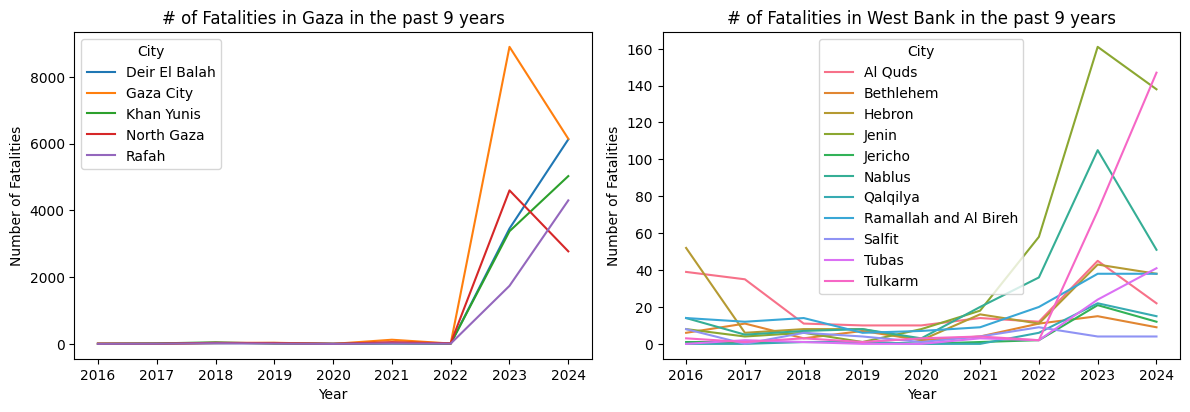

In [422]:
t = pds.groupby(['Year','Region', 'City']).sum('Number of Fatalities')
gaza = pds[pds['Region'] == 'Gaza Strip'].groupby(['Year','City']).sum('Number of Fatalities')
wb = pds[pds['Region'] == 'West Bank'].groupby(['Year','City']).sum('Number of Fatalities')
#p = sb.displot(x = 'Year', y = 'Number of Fatalities', data = t, col='Region')
f, axs = plt.subplots(1, 2, figsize=(12, 4))
sb.lineplot(x = 'Year', y = 'Number of Fatalities', data = gaza, hue='City', ax=axs[0])
sb.lineplot(x = 'Year', y = 'Number of Fatalities', data = wb, hue='City', ax=axs[1])
f.tight_layout()
axs[0].set_title('# of Fatalities in Gaza in the past 9 years');
axs[1].set_title('# of Fatalities in West Bank in the past 9 years');

As shown in the figure, the number of Fatalities done by the Israeli Occupation Force(IOF) are increasing. in the year 2023, the flooding of Al-Aqsa
operation started and the IOF's responce is shown in the plot on the left. In 2020, the prime minister of Israel Netanyahu's authority was challenged
thus resulting in the killing of Palestinians especially in cities where there is resistance in order to rally up the majority of the Israelis as most
of them are extremists, but he failed and another PM (Naftali Benet) was chosen in 2021 and he didn't stop the offences to maintain his position but then 
Netanyahu returned in 2022 continuing and even elevating the ethnic cleansing machine in both the West Bank and Gaza.

Q5: Do the prices get affected by the number of violent events that have happened in the same month?

<Axes: ylabel='Number of Events'>

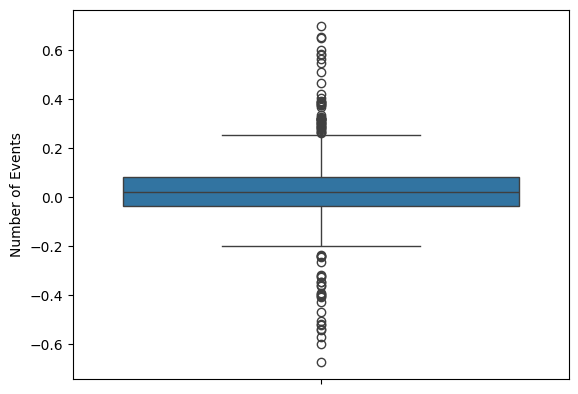

In [652]:
def periodize(row):
    return '' + str(row['Month']) + '-' + str(row['Year'])
pds['month_num'] = pds.apply(periodize, axis=1)
fds['month_num'] = pd.to_datetime(fds['date']).dt.to_period('M')
pds['month_num'] = pd.to_datetime(pds['month_num'], format='%B-%Y').dt.to_period('M')
pds = pds.rename(columns={'City':'city', 'Region':'region'})
merged = fds.merge(pds, how='inner').dropna().groupby(['category','month_num'])
#merged_sub = merged[['month_num','region', 'city', 'category', 'commodity', 'unified_price', 'Number of Events', 'Number of Fatalities']]
merged_sub = merged[['unified_price', 'Number of Events']]
merged_corr = merged_sub.corr()
merged_corr = merged_corr.drop(merged_corr[merged_corr['Number of Events'] == 1].index)
sb.boxplot(merged_corr.sort_values(by='Number of Events')['Number of Events'])

As shown in the correlation factor box plot, the median is slightly above the 0 meaning that the events do not affect the prices of commodities per month. Had the median been on the 0.2 mark, we could make the argument that the events affect prices. The data makes no sense for me, maybe because I don't understand what does "Event" mean correctly or maybe I lack understanding a statistical concept.